                                        NOTEBOOK for COVID Pakistan
The purpose of this notebook is to analyze the covid situation in pakistan and to predict the covid positive cases for the next day , we will be performing:

Exploratory data analysis

data cleaning 

feature engineering 

applying deep learning model

evaluating the results

we need a data that describes the facts of increase in corona cases or else we need to work on feature engineering

In [73]:
import numpy as np 
import pandas as pd
import pandas_profiling
import warnings
import math
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM,Convolution1D,Bidirectional
from tensorflow import keras
# import tensorflow as tf

In [3]:
# cmprssd = pd.read_csv("key_indicators_of_covid - Sheet1.csv")
# data = pd.read_csv("COVID_FINAL_DATA - TimeSeries_KeyIndicators_Detail.csv")
data = pd.read_csv("best_covid_data - Sheet1.csv",parse_dates=['date'])
data.drop(['location','continent','iso_code','icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions' ,'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million'],axis=1,inplace=True)
pd.set_option('display.max_columns', None)
data.head(30)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2020-02-25,2,2,NaN,NaN,NaN,NaN,0.009,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
1,2020-02-26,2,0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
2,2020-02-27,2,0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
3,2020-02-28,4,2,NaN,NaN,NaN,NaN,0.018,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
4,2020-02-29,4,0,NaN,NaN,NaN,NaN,0.018,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
5,2020-03-01,4,0,0.571,NaN,NaN,0.000,0.018,0.000,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
6,2020-03-02,5,1,0.714,NaN,NaN,0.000,0.023,0.005,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
7,2020-03-03,5,0,0.429,NaN,NaN,0.000,0.023,0.000,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
8,2020-03-04,5,0,0.429,NaN,NaN,0.000,0.023,0.000,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
9,2020-03-05,6,1,0.571,NaN,NaN,0.000,0.027,0.005,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,220892331,255.573,23.5,4.495,2.78,5034.708,4,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557


In [4]:
data['active']=data['new_cases']-data['new_deaths']

In [5]:
# data.duplicated().sum()
data.tests_units.describe()

count                 353
unique                  1
top       tests performed
freq                  353
Name: tests_units, dtype: object

In [6]:
data.isnull().sum()

date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  5
total_deaths                       22
new_deaths                         22
new_deaths_smoothed                 5
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      5
total_deaths_per_million           22
new_deaths_per_million             22
new_deaths_smoothed_per_million     5
reproduction_rate                  21
new_tests                          34
total_tests                        26
total_tests_per_thousand           26
new_tests_per_thousand             34
new_tests_smoothed                 24
new_tests_smoothed_per_thousand    24
positive_rate                      25
tests_per_case                     25
tests_units                        17
stringency_index                    6
population                          0
population_density                  0
median_age  

now we will start analysing the data through different calculations and visualization, we will try to uncover the reason of increase in covid cases with this dataset and to understand when the covid increased and decreased and why.

<AxesSubplot:>

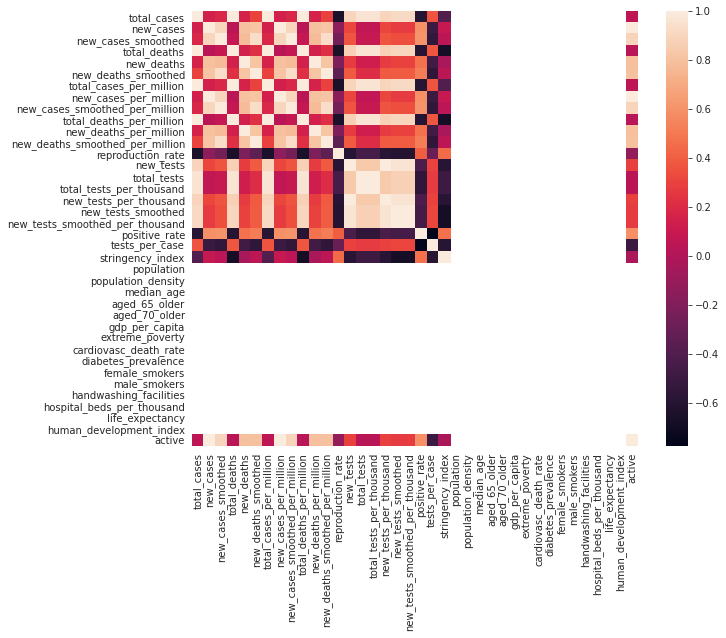

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(data.corr())

<AxesSubplot:>

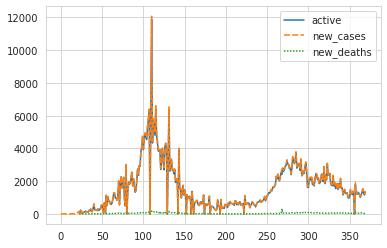

In [8]:
tri=[data['active'],data['new_cases'],data['new_deaths']]
sns.lineplot(data=tri)

<AxesSubplot:xlabel='date', ylabel='total_deaths'>

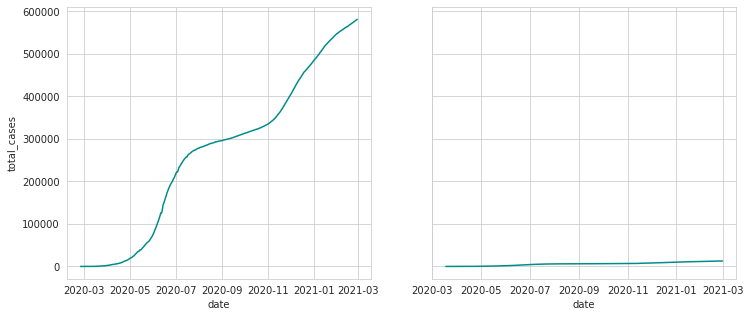

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)
sns.lineplot(x='date',y='total_cases',data=data,ax=ax1,color='darkcyan')
sns.lineplot(x='date',y='total_deaths',data=data,ax=ax2,color='darkcyan')
# throughout the year cases have been increasing constantly

In [10]:
(data['total_deaths'].sum()/data['total_cases'].sum())*100
# from total cases only 2.09% deaths occured 

2.0961713937249176

<AxesSubplot:xlabel='date', ylabel='new_deaths'>

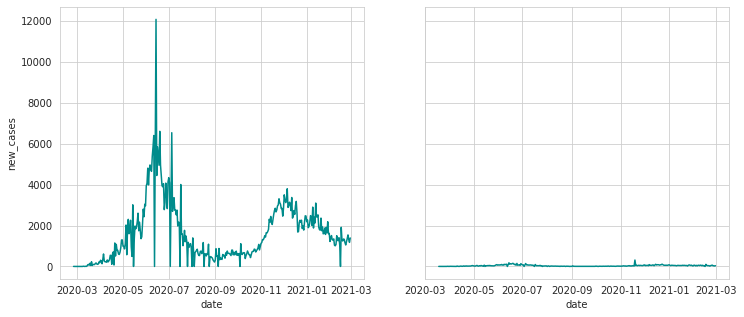

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)
sns.lineplot(x='date',y='new_cases',data=data,ax=ax1,color='darkcyan')
sns.lineplot(x='date',y='new_deaths',data=data,ax=ax2,color='darkcyan')
# it seems that from 2020-5 to  2020-8 corona cases increased significantly 

In [12]:
(data['new_deaths'].sum()/data['new_cases'].sum())*100
# from new cases only 2.21% deaths occured

2.218227791490716

<AxesSubplot:xlabel='date', ylabel='stringency_index'>

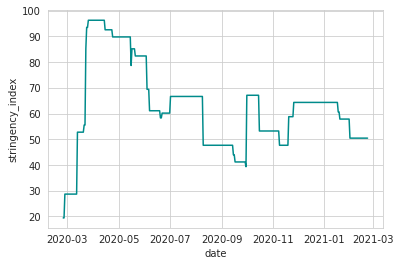

In [13]:
# stringency_index:This is a composite measure based on nine response indicators including school closures,
# workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest).
sns.lineplot(x='date',y='stringency_index',data=data,color='darkcyan')
# so commparing this graph with the graph above, it seems that lockdown and relative measures were applied 
# strictly before the corona cases increased significantly. so we can assume that applying strict SOP's at 
# regional level did not help prevent the spread of corona virus, stringency index and total cases both seems to be
# correlated with each other instead because both seems to have same pattern of trends.

<AxesSubplot:xlabel='date', ylabel='new_deaths_smoothed'>

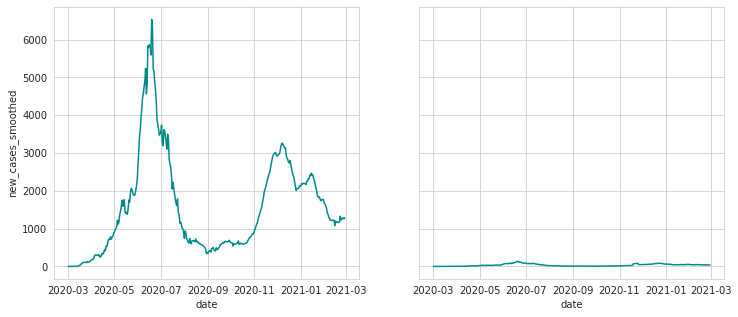

In [14]:
# sns.set(rc={"axes.facecolor":"#283747","axes.grid":False})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)
sns.lineplot(x='date',y='new_cases_smoothed',data=data,ax=ax1,color='darkcyan')
sns.lineplot(x='date',y='new_deaths_smoothed',data=data,ax=ax2,color='darkcyan')
# tests that were conducted against confirmed cases have also increased in the same time frame and this confirms
# our above hyptothesis.

In [15]:
(data['new_deaths_smoothed'].sum()/data['new_cases_smoothed'].sum())*100
# from total cases smoothed only 2.21% deaths occured

2.2153862627819003

<AxesSubplot:xlabel='date', ylabel='positive_rate'>

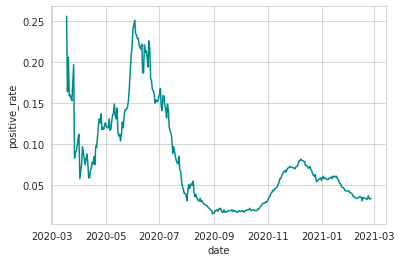

In [16]:
sns.lineplot(x='date',y='positive_rate',data=data,color='darkcyan')
# positive rate shows the similar pattern as new cases , but there was an inital uprising
# at 2020-3 which remained for a month and then immediately went down at 2020-4.

In [17]:
data.active.sum()
# these have been the active cases through out the pandemic 

568170.0

<AxesSubplot:xlabel='date', ylabel='active'>

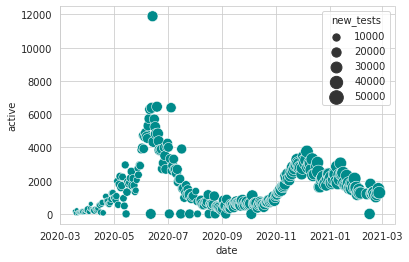

In [18]:
sns.scatterplot(x='date',y='active',size='new_tests',sizes=(20,200),data=data,color='darkcyan')
# total active cases from 2020-3 to 2021-3

<AxesSubplot:xlabel='date', ylabel='positive_rate'>

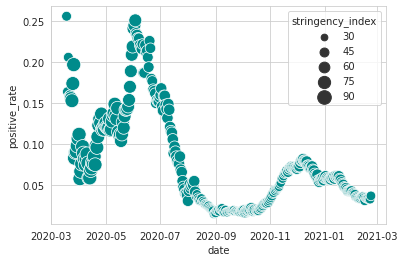

In [19]:
sns.scatterplot(x='date',y='positive_rate',size='stringency_index',sizes=(20,200),data=data,color='darkcyan')
# there is a clear increase in stringency index before the uprising of the positive cases in coronavirus this also
# implies that applying SOP's and lockdown and several other anti-corona measures did not help prevent the spread 
# of coronavirus.

In [20]:
# People living with heart problems might be especially wary, since cardiovascular conditions are associated
# with severe coronavirus disease and a higher risk of death. 
# People with diabetes are more likely to have serious complications from COVID-19. In general, people with 
# diabetes are more likely to have more severe symptoms and complications when infected with any virus
# . Your risk of getting very sick from COVID-19 is likely to be lower if your diabetes is well-managed

In [21]:
data1 = pd.read_csv("COVID-19-3jun.csv",parse_dates=['Date'])
# importing the second dataset

In [22]:
data1['Active']=data1['Cases']-data1['Deaths']
# data1.head(5)

# here we are creating a new feature called active by substracting the cases with deaths

<AxesSubplot:>

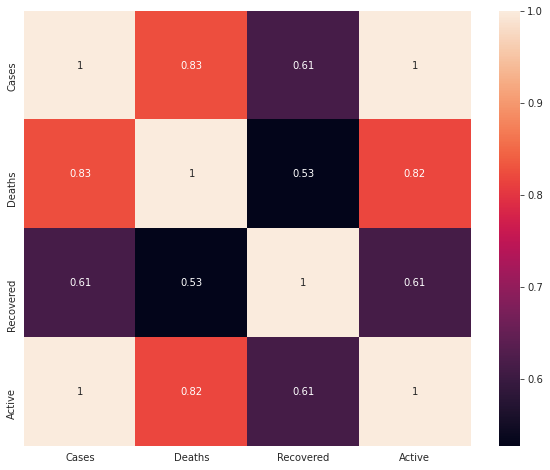

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(data1.corr(),annot=True)
# Active and Cases are highly correlated to each other 

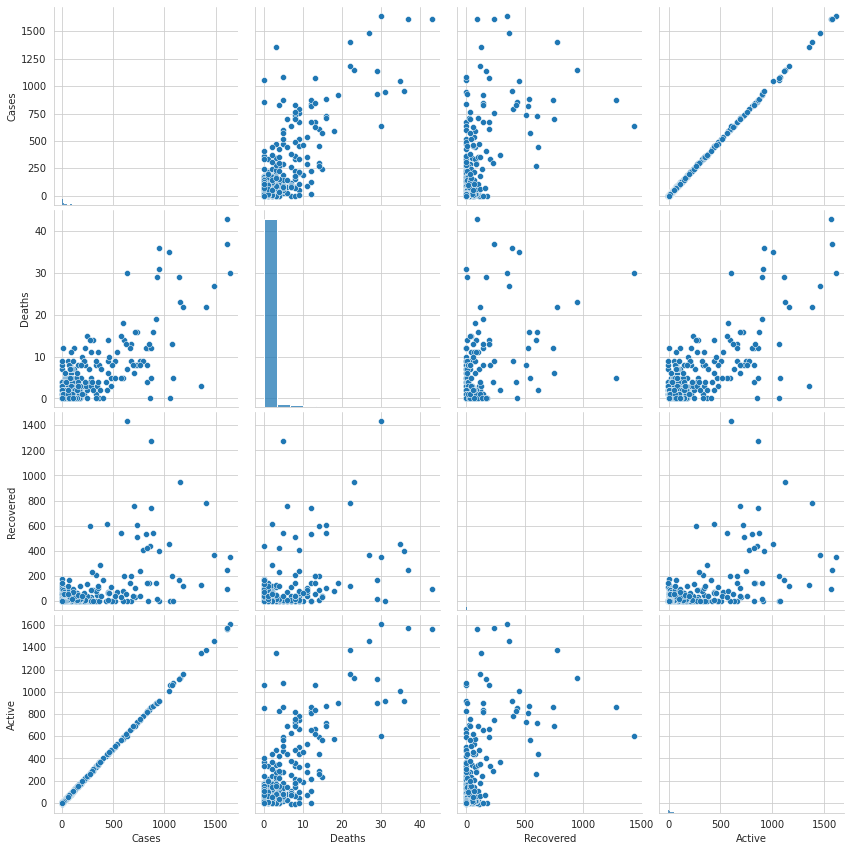

In [24]:
sns.pairplot(data1,size=3)
# the pariplot confirms the heatmap above that active and cases are correlated

In [25]:
# plt.figure(figsize=(16,6))
# trio=[data1['Cases'],data1['Deaths'],data1['Recovered'],data1['Active']]
# sns.lineplot(data=trio)
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

px.line(data1, x='Date', y=['Cases','Deaths','Recovered'], labels={'Date':'Date'},
       title='Cases vs Recovered vs Deaths',width=900,height=600)

# this plot shows the frequency of cases , deaths and recovered

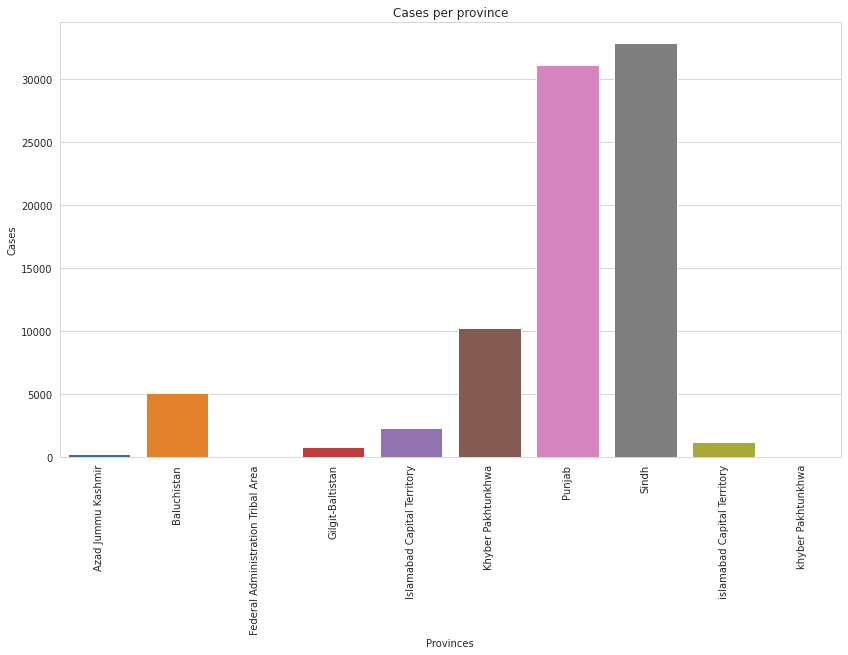

In [26]:
plot=data1.groupby('Province').Cases.sum()
plt.figure(figsize=(14,8))
ax = sns.barplot(x=plot.index, y=plot.values)
ax.set(ylabel="Cases", xlabel = "Provinces")
ax.set_title("Cases per province")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
# showing the sum cases of each province

<AxesSubplot:xlabel='Province', ylabel='Cases'>

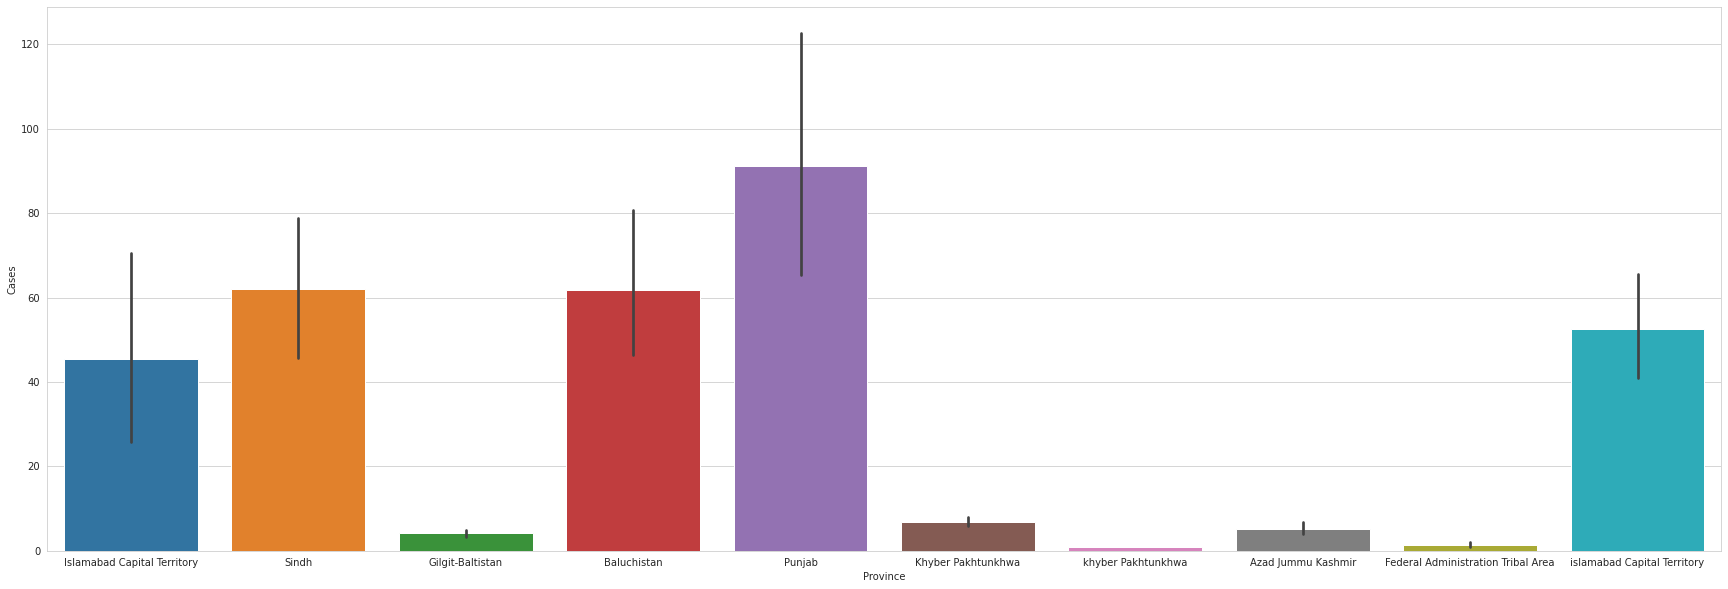

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x='Province',y='Cases',data=data1)
# this plot shows the mean cases of each province 

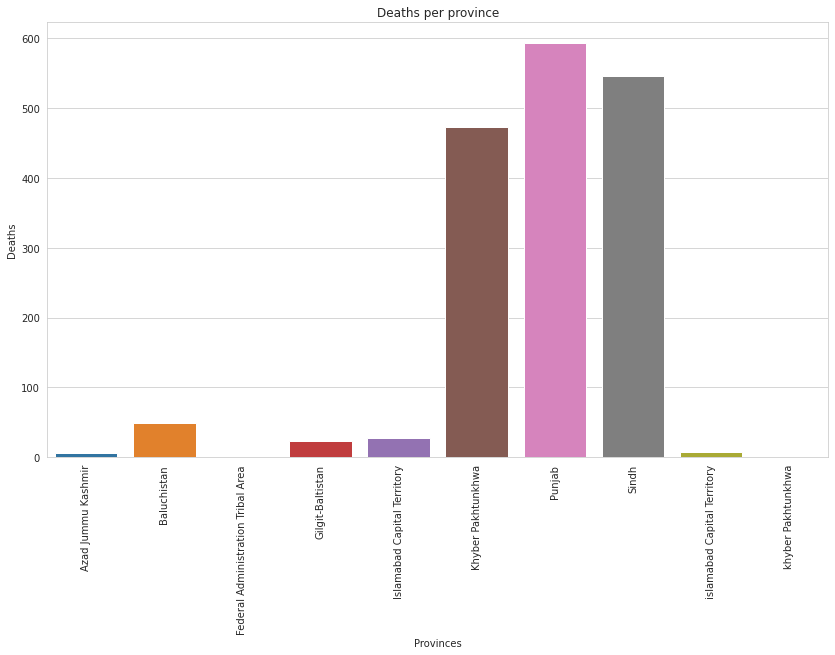

In [28]:
plot=data1.groupby('Province').Deaths.sum()
plt.figure(figsize=(14,8))
ax = sns.barplot(x=plot.index, y=plot.values)
ax.set(ylabel="Deaths", xlabel = "Provinces")
ax.set_title("Deaths per province")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
# showing the sum deaths of each province

<AxesSubplot:xlabel='Province', ylabel='Deaths'>

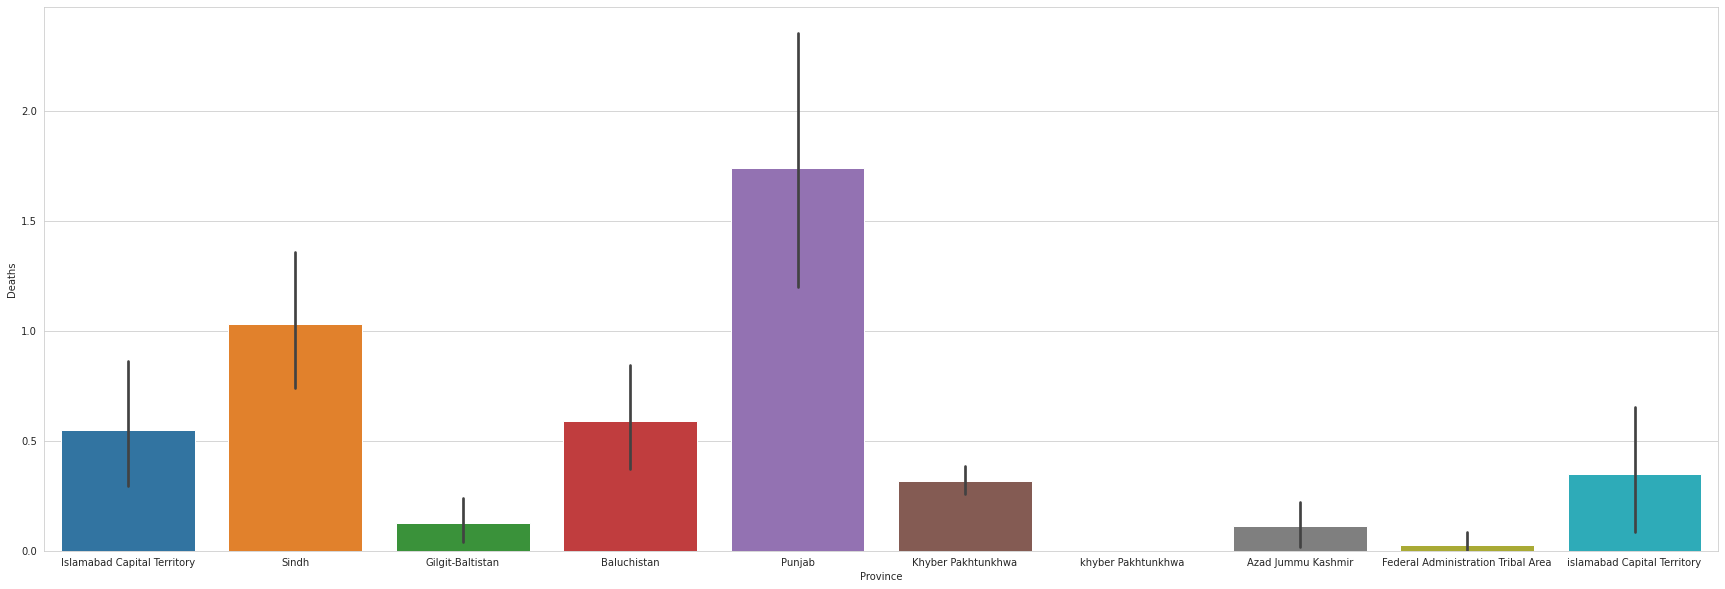

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x='Province',y='Deaths',data=data1)
# this plot shows the mean deaths of each province

In [30]:
data1.groupby('Province').Recovered.agg(['sum'])
# showing the sum recovered of each province

,sum
Province,
Azad Jummu Kashmir,110
Baluchistan,1981
Federal Administration Tribal Area,15
Gilgit-Baltistan,363
Islamabad Capital Territory,381
Khyber Pakhtunkhwa,1939
Punjab,4081
Sindh,15805
islamabad Capital Territory,79


<AxesSubplot:xlabel='Province', ylabel='Recovered'>

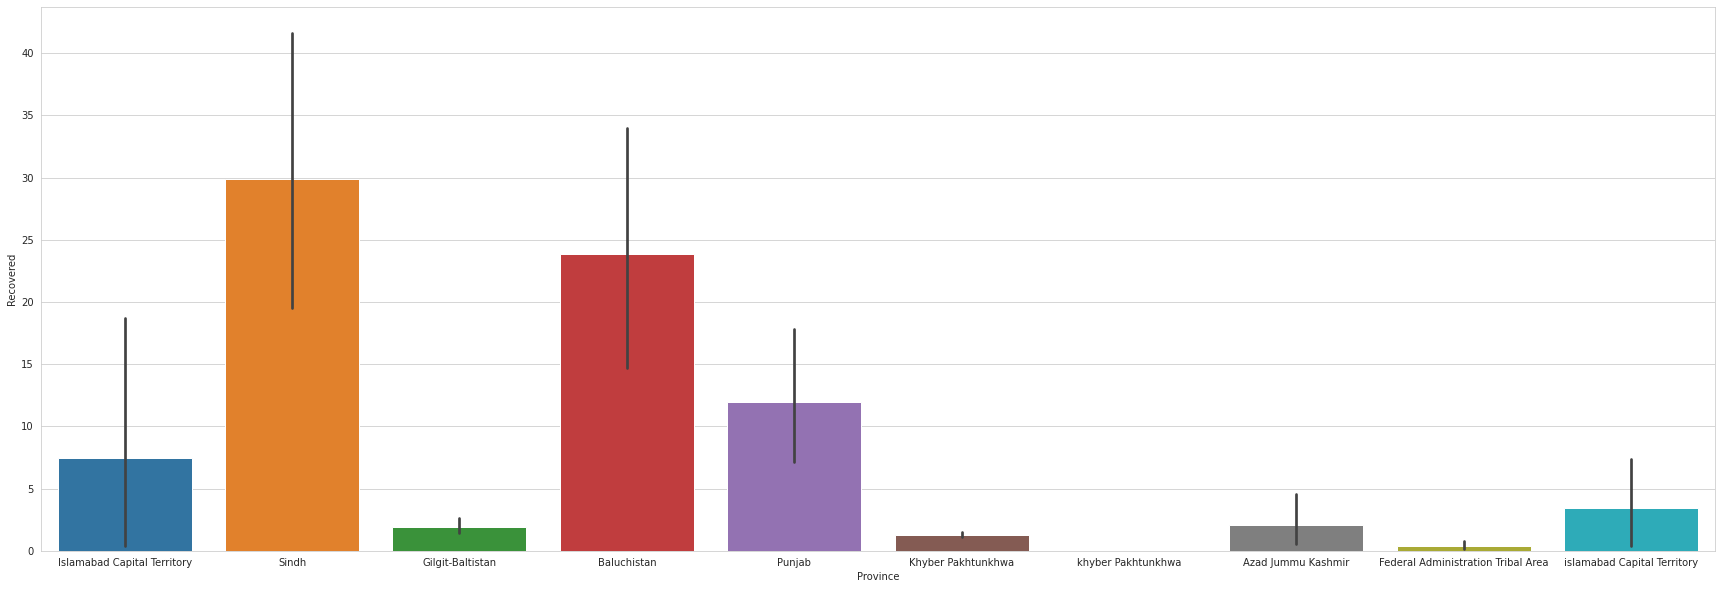

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(x='Province',y='Recovered',data=data1)
# this plot shows the mean recovered of each province

In [32]:
data1.groupby('Province').Active.agg(['mean'])
# showing the sum active of each province

,mean
Province,
Azad Jummu Kashmir,5.166667
Baluchistan,61.156627
Federal Administration Tribal Area,1.444444
Gilgit-Baltistan,4.015789
Islamabad Capital Territory,44.803922
Khyber Pakhtunkhwa,6.570853
Punjab,89.451613
Sindh,61.081285
islamabad Capital Territory,52.260870


<AxesSubplot:xlabel='Province', ylabel='Active'>

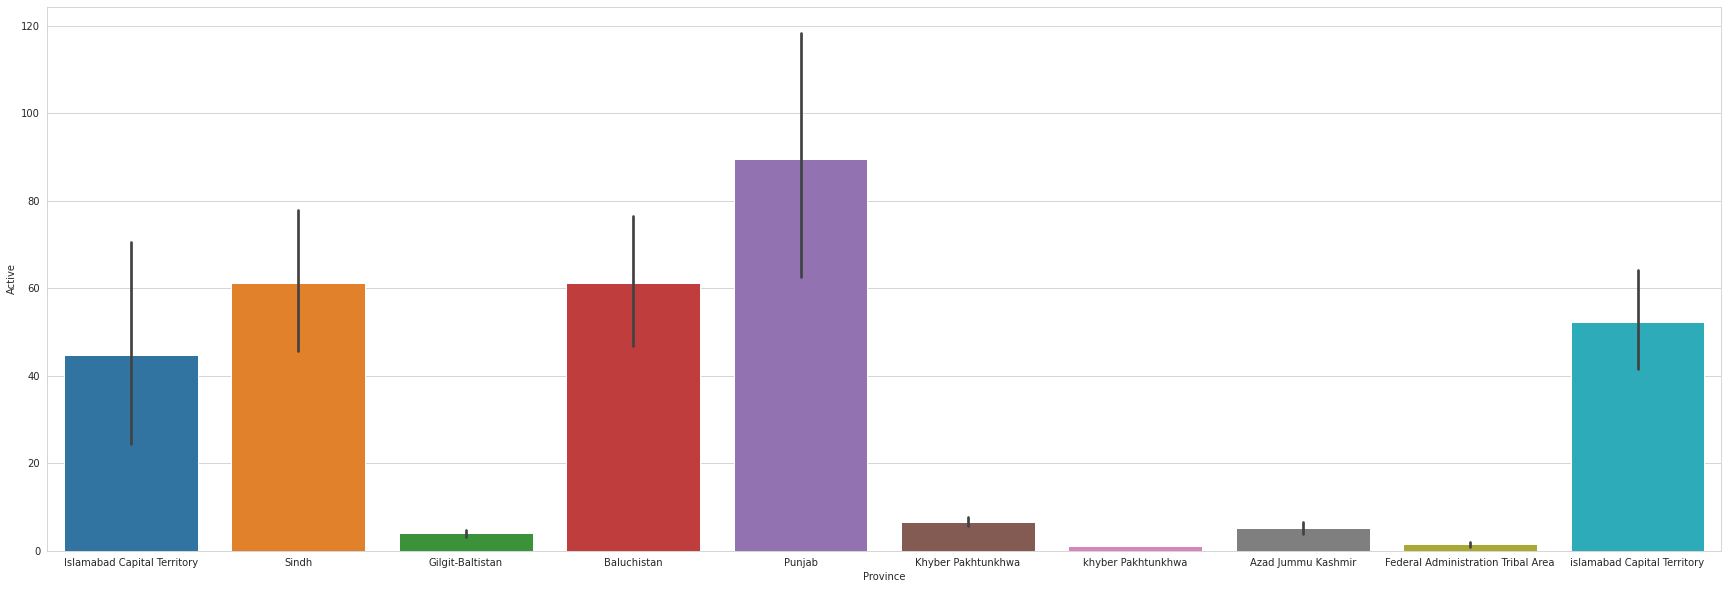

In [33]:
plt.figure(figsize=(30,10))
sns.barplot(x='Province',y='Active',data=data1)
# this plot shows the mean active of each province

<AxesSubplot:xlabel='Lockdown', ylabel='Cases'>

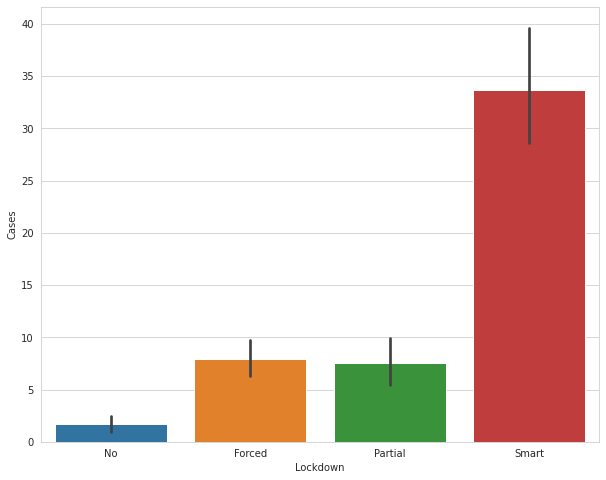

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='Lockdown',y='Cases',data=data1)
# this plot shows that in smart lockdown the cases(mean) increased.

<AxesSubplot:xlabel='Lockdown', ylabel='Deaths'>

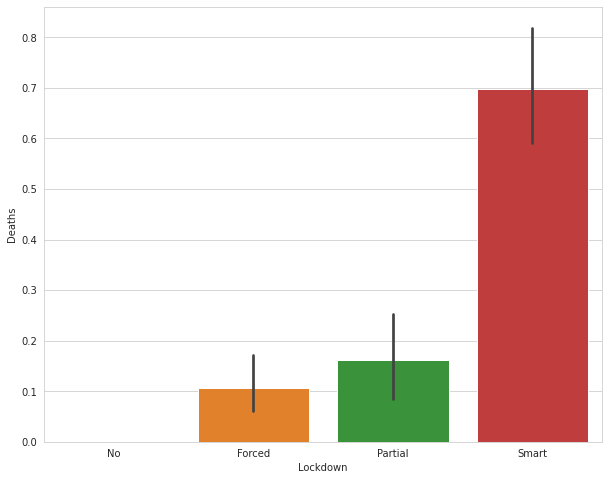

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x='Lockdown',y='Deaths',data=data1)
# this plot shows that in smart lockdown the deaths(mean) increased.

<AxesSubplot:xlabel='Lockdown', ylabel='Recovered'>

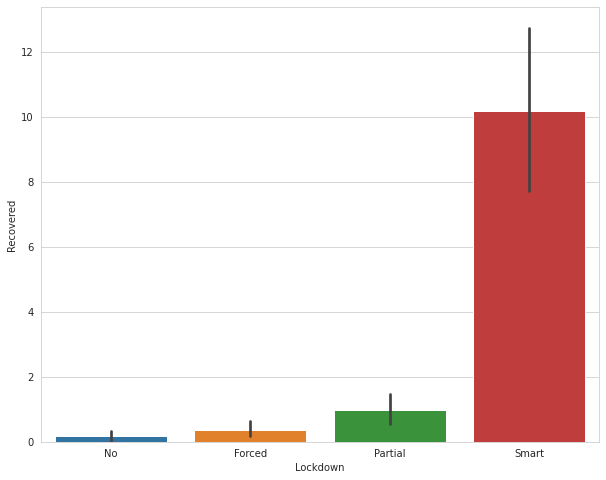

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='Lockdown',y='Recovered',data=data1)
# this plot shows that in smart lockdown the recovery rate was greater compared to other three scenerios

<AxesSubplot:xlabel='Lockdown', ylabel='Active'>

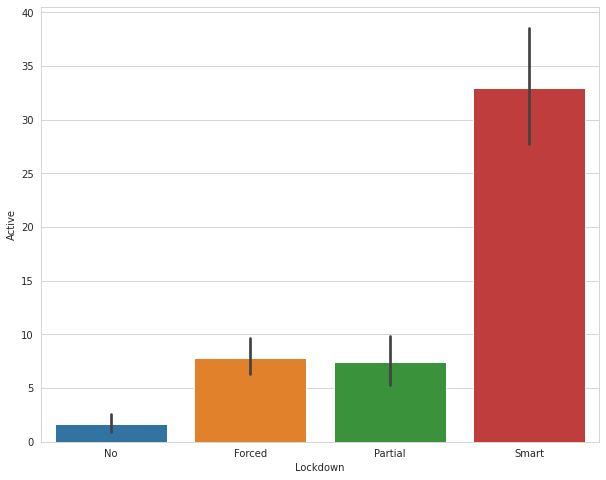

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x='Lockdown',y='Active',data=data1)
# this plot shows that in smart lockdown the active cases were greater compared to other three scenerios

<AxesSubplot:xlabel='Date', ylabel='Cases'>

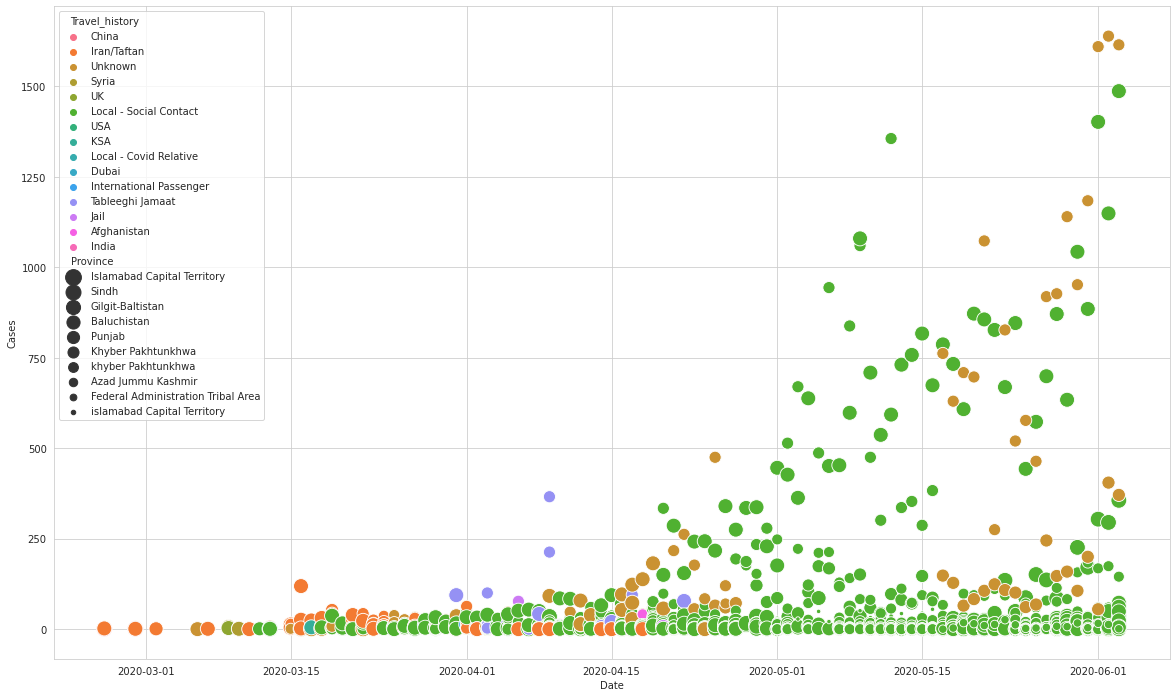

In [38]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Date',y='Cases',hue='Travel_history',size='Province',sizes=(20,250),data=data1)
# The cause of the most of the corona cases is local - social contact mostly in islamabad and sindh and punjab.

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

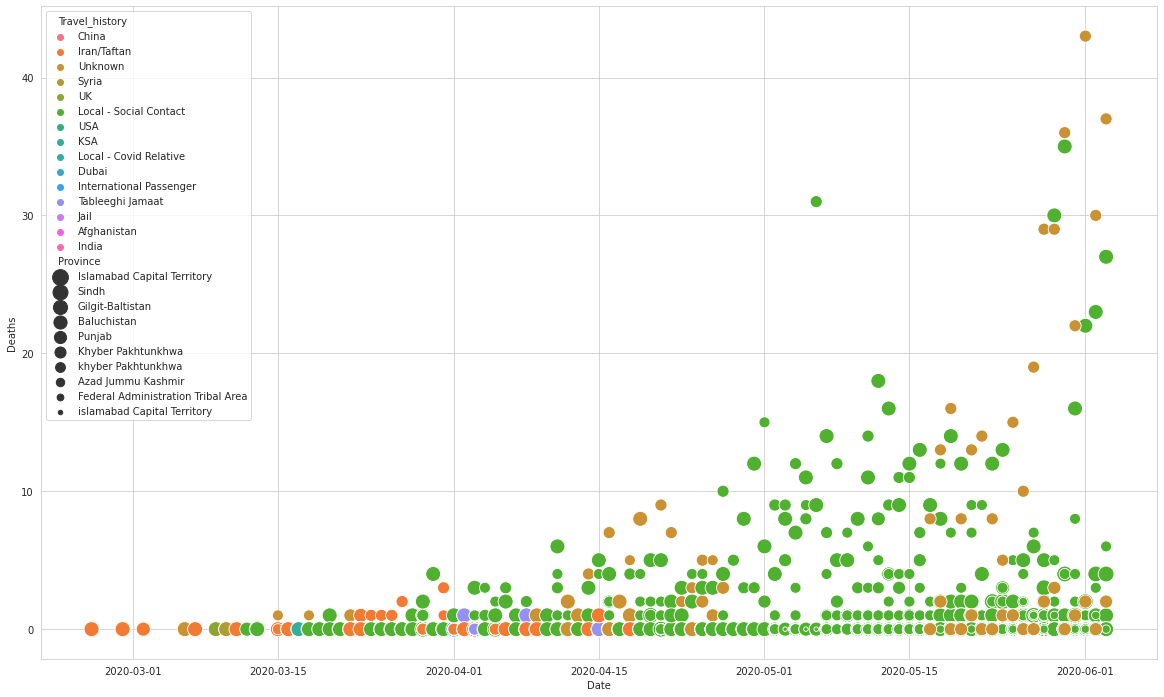

In [39]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Date',y='Deaths',hue='Travel_history',size='Province',sizes=(20,250),data=data1)
# large number of deaths were caused by local - social contact and unknown reasons in islamabad , punjab ,sindh
# khyber pakhtunkhwa

<AxesSubplot:xlabel='Date', ylabel='Recovered'>

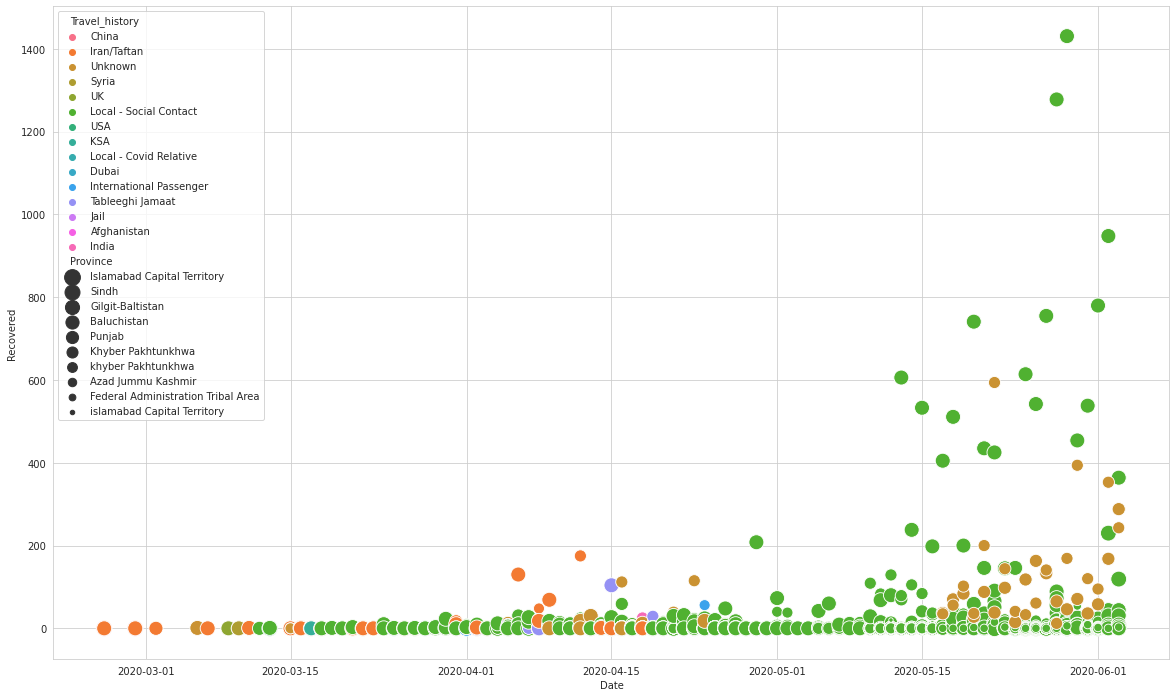

In [40]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Date',y='Recovered',hue='Travel_history',size='Province',sizes=(20,250),data=data1)

<AxesSubplot:xlabel='Date', ylabel='Active'>

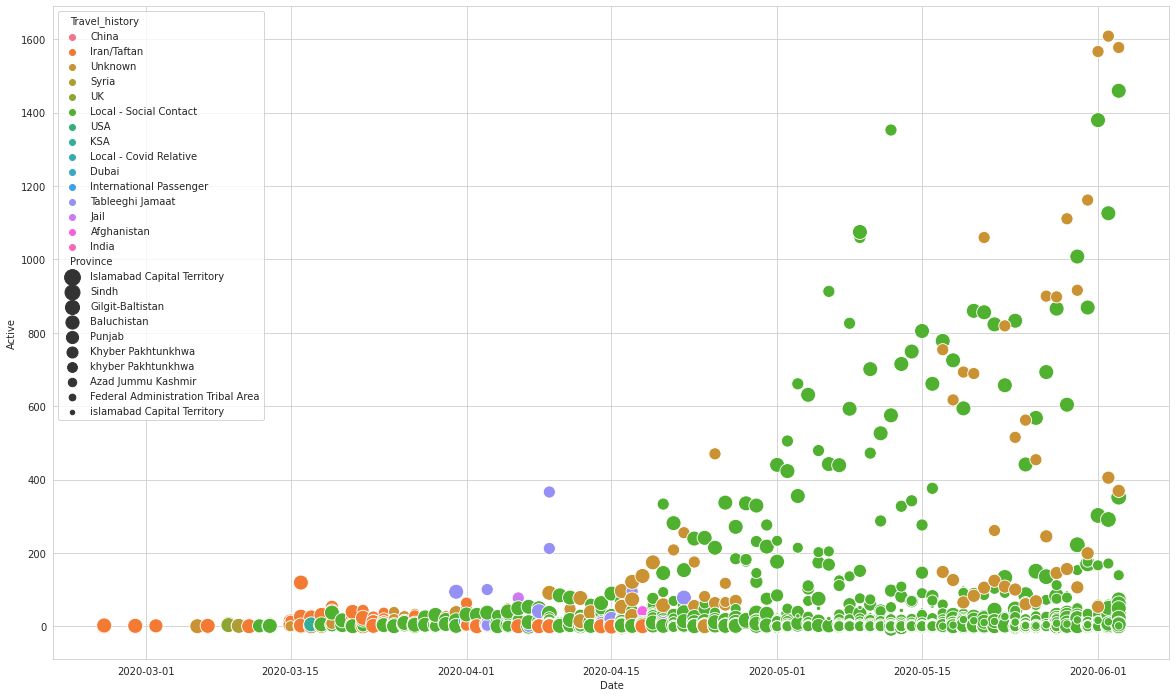

In [41]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Date',y='Active',hue='Travel_history',size='Province',sizes=(20,250),data=data1)
# see for the active cases

<AxesSubplot:xlabel='Date', ylabel='Cases'>

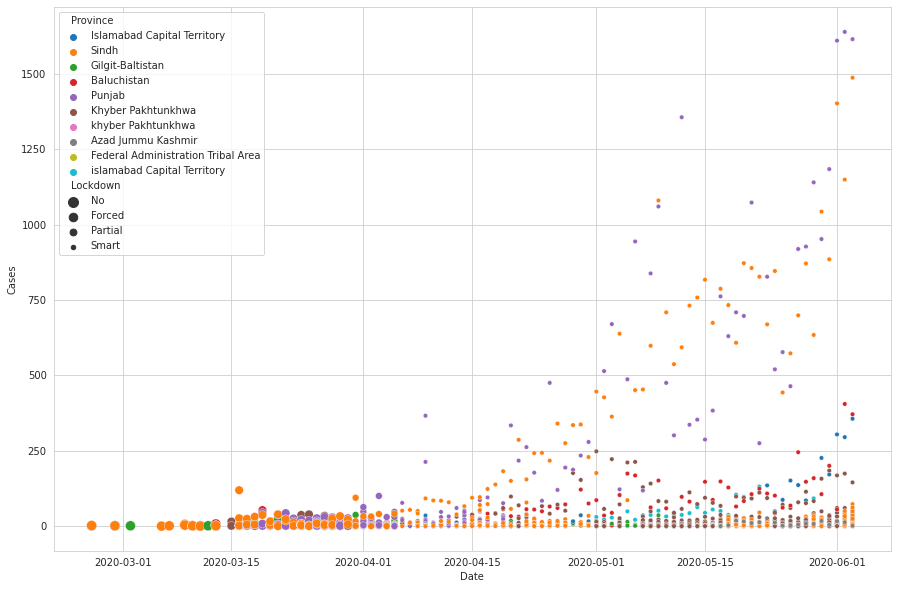

In [42]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Date',y='Cases',hue='Province',size='Lockdown',sizes=(20,100),data=data1)
# as you can see that large number of cases were discovered from 2020-4-15 to 2020-6-01 and most of the cases 
# belong to sindh and punjab when smart lockdown was applied.

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

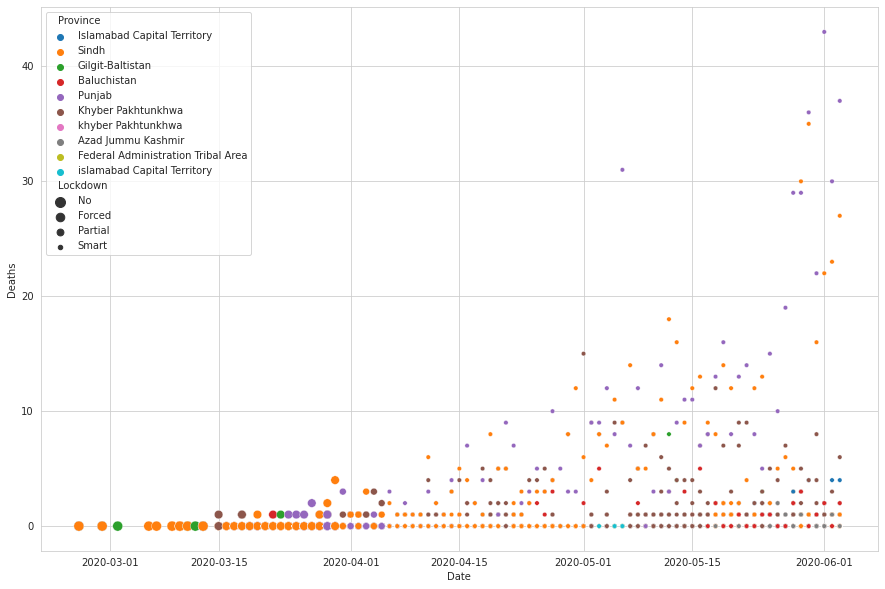

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Date',y='Deaths',hue='Province',size='Lockdown',sizes=(20,100),data=data1)
# see for deaths 

<AxesSubplot:xlabel='Date', ylabel='Recovered'>

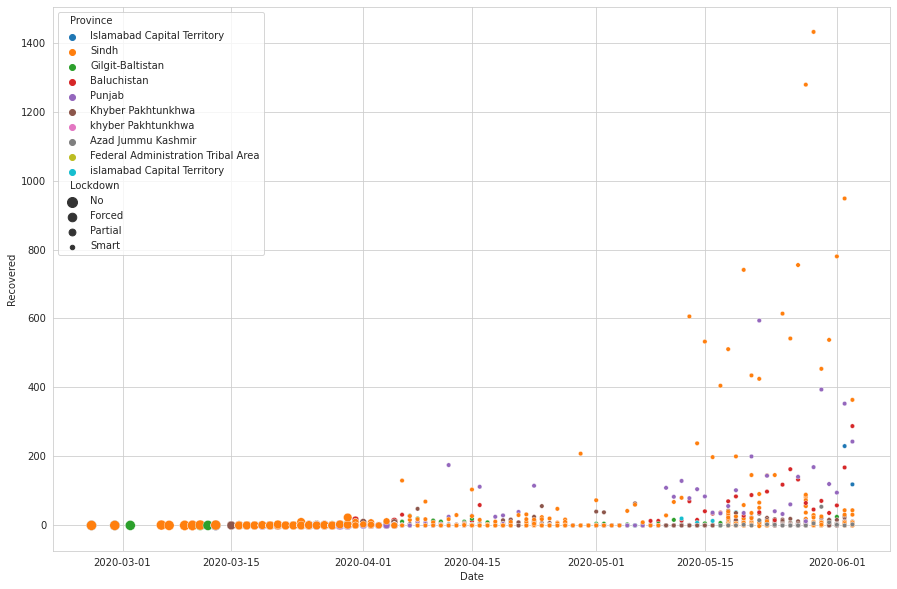

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Date',y='Recovered',hue='Province',size='Lockdown',sizes=(20,100),data=data1)
# see for recovered

<AxesSubplot:xlabel='Date', ylabel='Active'>

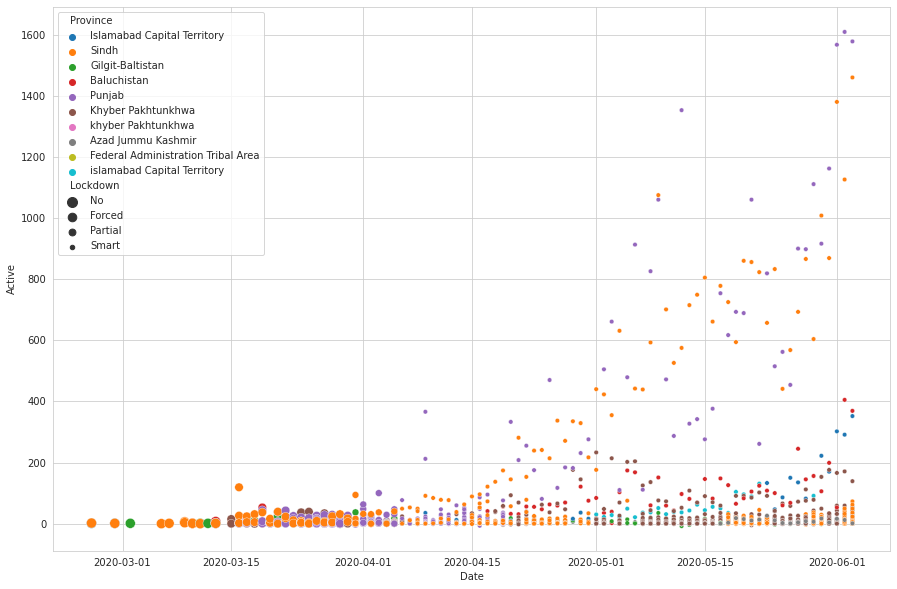

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Date',y='Active',hue='Province',size='Lockdown',sizes=(20,100),data=data1)
# see for active

In [46]:
plot=data1.groupby('City')['Cases'].sum().sort_values(ascending=False)[0:5]
plot
# plt.figure(figsize=(10,8))
# ax = sns.barplot(x=plot.index, y=plot.values,hue='Lockdown')
# ax.set(ylabel="Cases", xlabel = "Top 5 cities")
# ax.set_title("Top most effected cities by corona")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show()
# the sum of corona cases for each city

City
Karachi      29346
Lahore       28015
Quetta        5109
Peshawar      4923
Islamabad     3455
Name: Cases, dtype: int64

In [47]:
data1.groupby('City').Deaths.agg(['sum'])
# sum of death for each city 

,sum
City,
Abbottabad,14
Astore,14
Attock,0
Badin,4
Bahawal Nagar,0
...,...
Trarkhel,0
Umerkot,1
Vehari,0


In [48]:
data1.groupby('City').Recovered.agg(['sum'])
# sum of recovered for each city 

,sum
City,
Abbottabad,44
Astore,62
Attock,0
Badin,11
Bahawal Nagar,4
...,...
Trarkhel,0
Umerkot,1
Vehari,6


In [49]:
data1.groupby('City').Active.agg(['sum'])
# sum of active for each city 

,sum
City,
Abbottabad,265
Astore,55
Attock,15
Badin,52
Bahawal Nagar,21
...,...
Trarkhel,1
Umerkot,8
Vehari,72


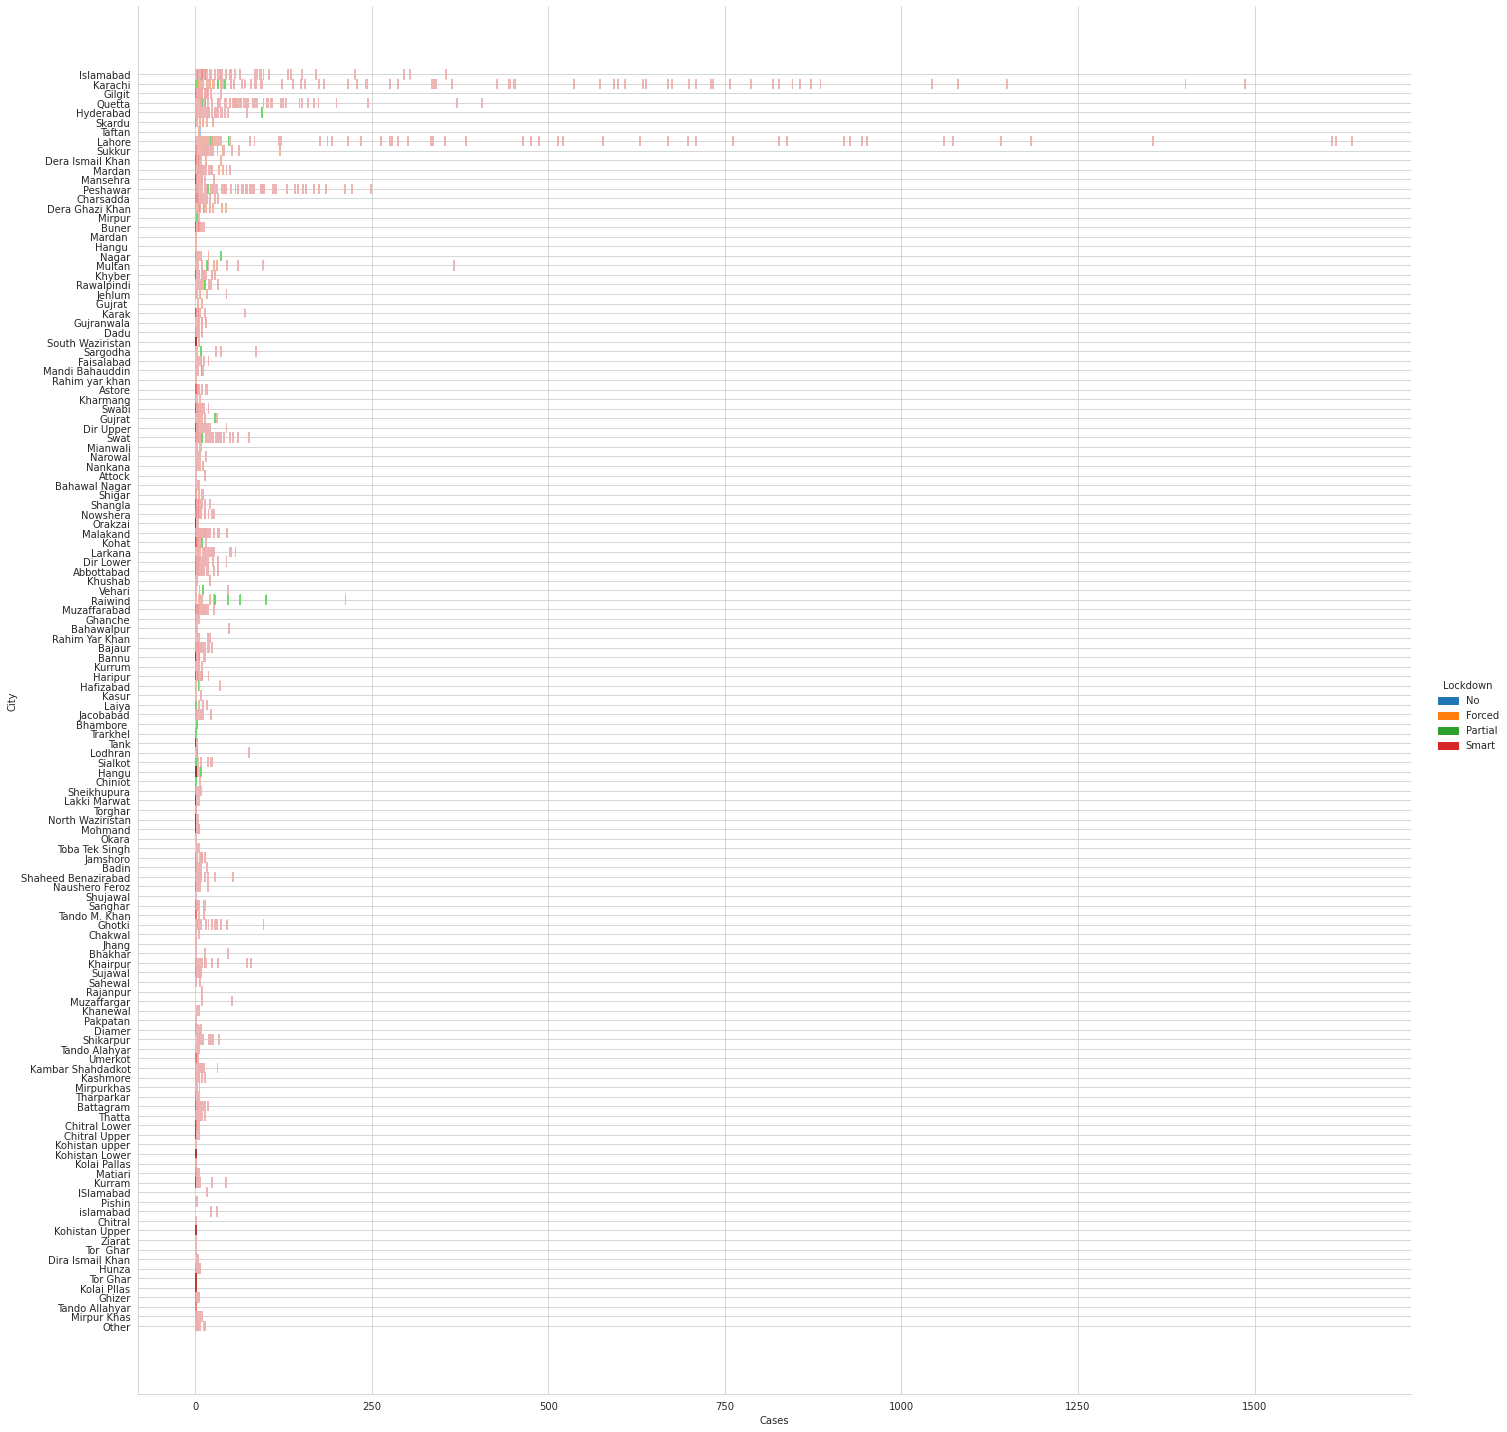

In [50]:
sns.displot(x='Cases', y="City",data=data1,hue='Lockdown',height=20)
# most of the cases belong to islamabad, kararchi or lahore when smart lockdown was applied

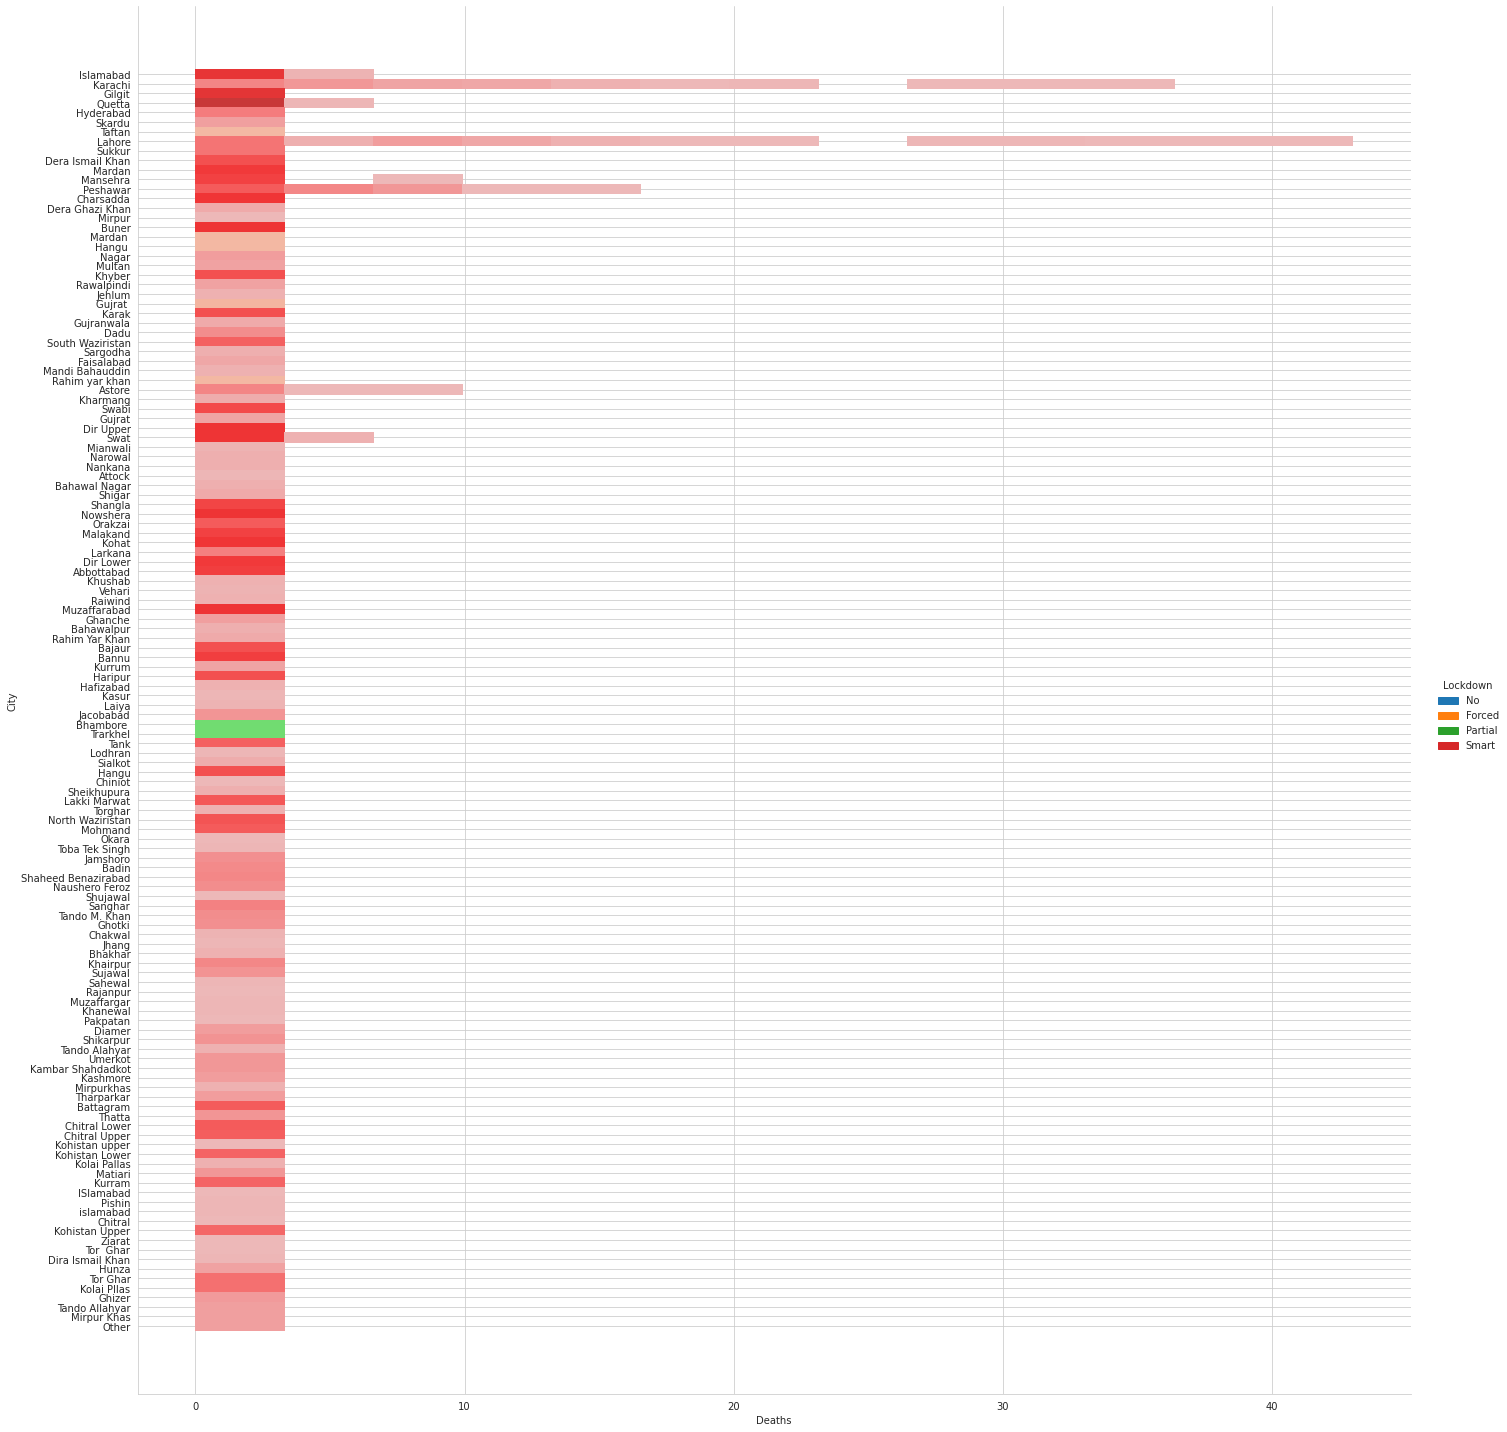

In [51]:
sns.displot(x='Deaths', y="City",data=data1,hue='Lockdown',height=20)
# see for the deaths 

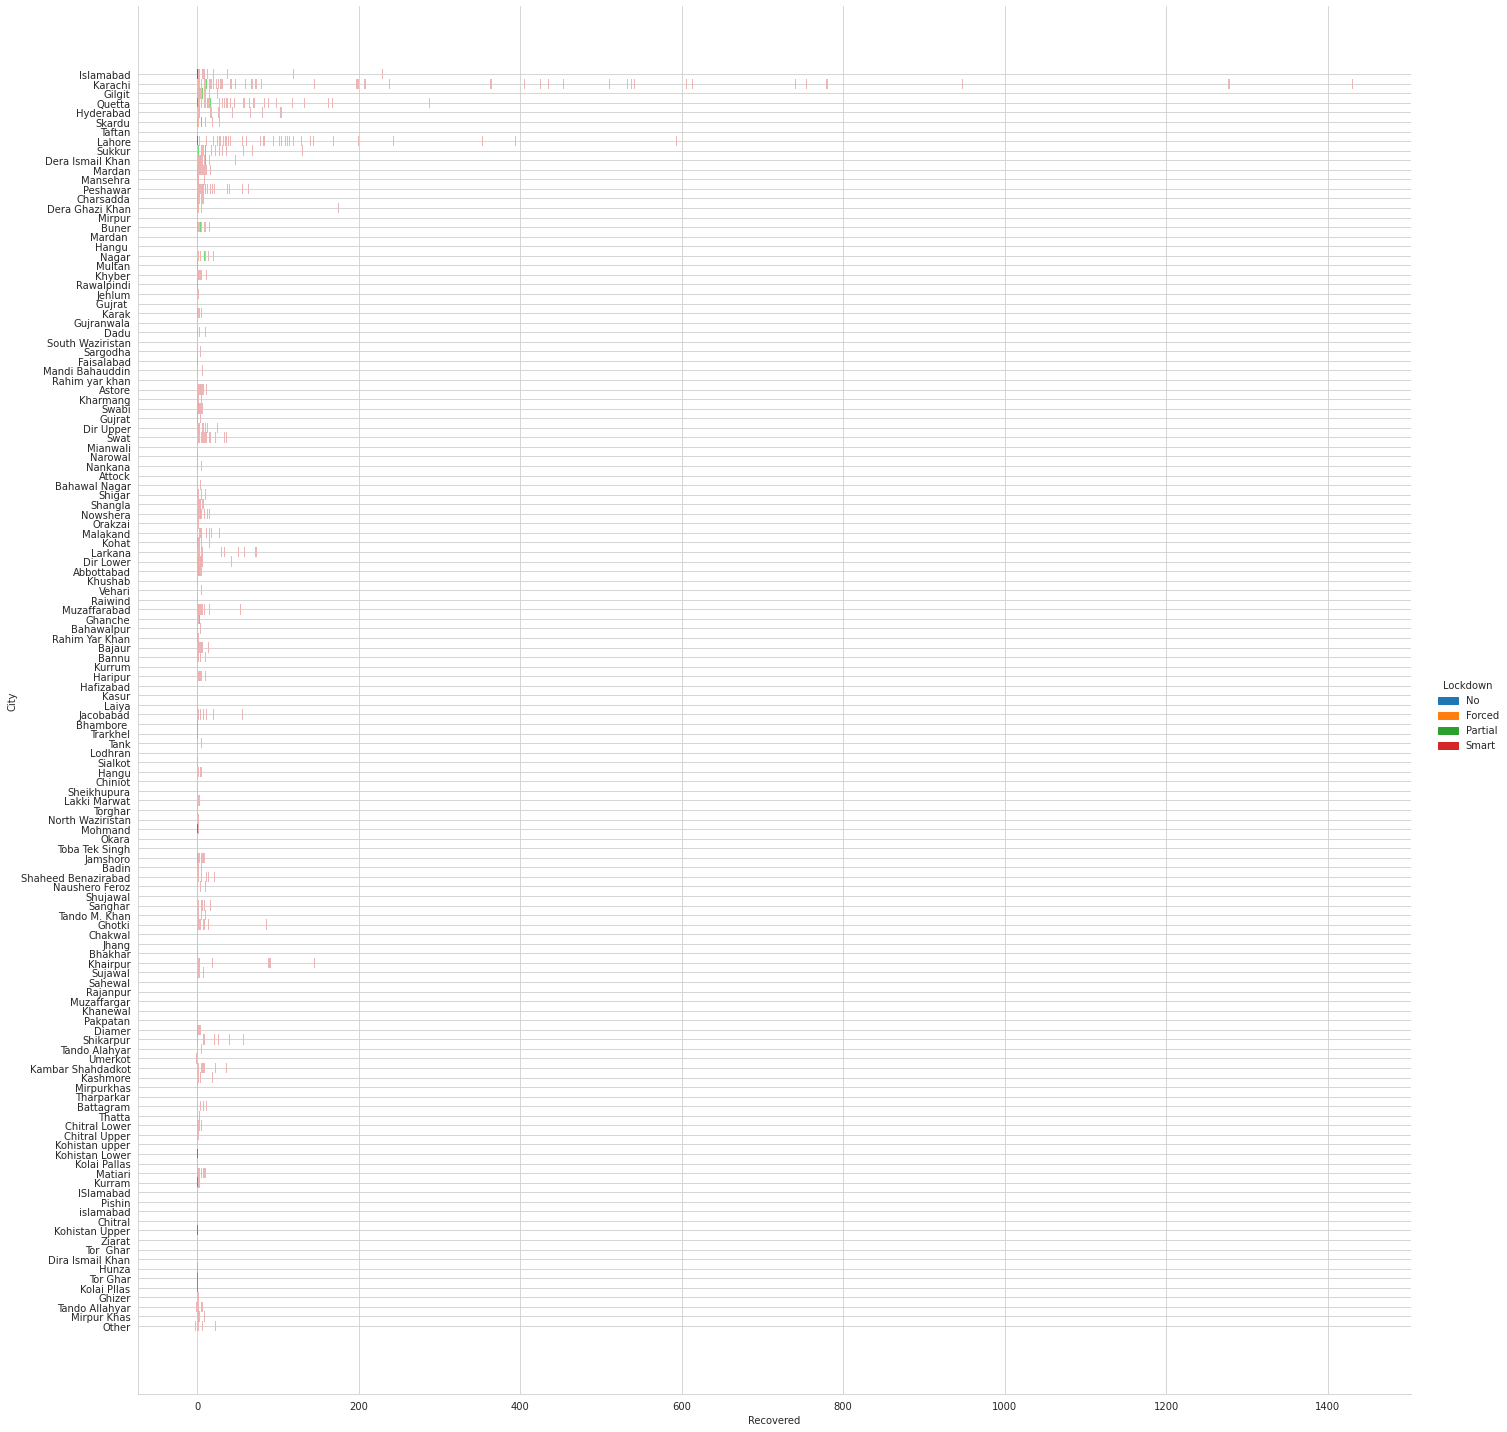

In [52]:
# sns.set_style("darkgrid")
sns.displot(x='Recovered', y="City",data=data1,hue='Lockdown',height=20)
# see the recovered cases

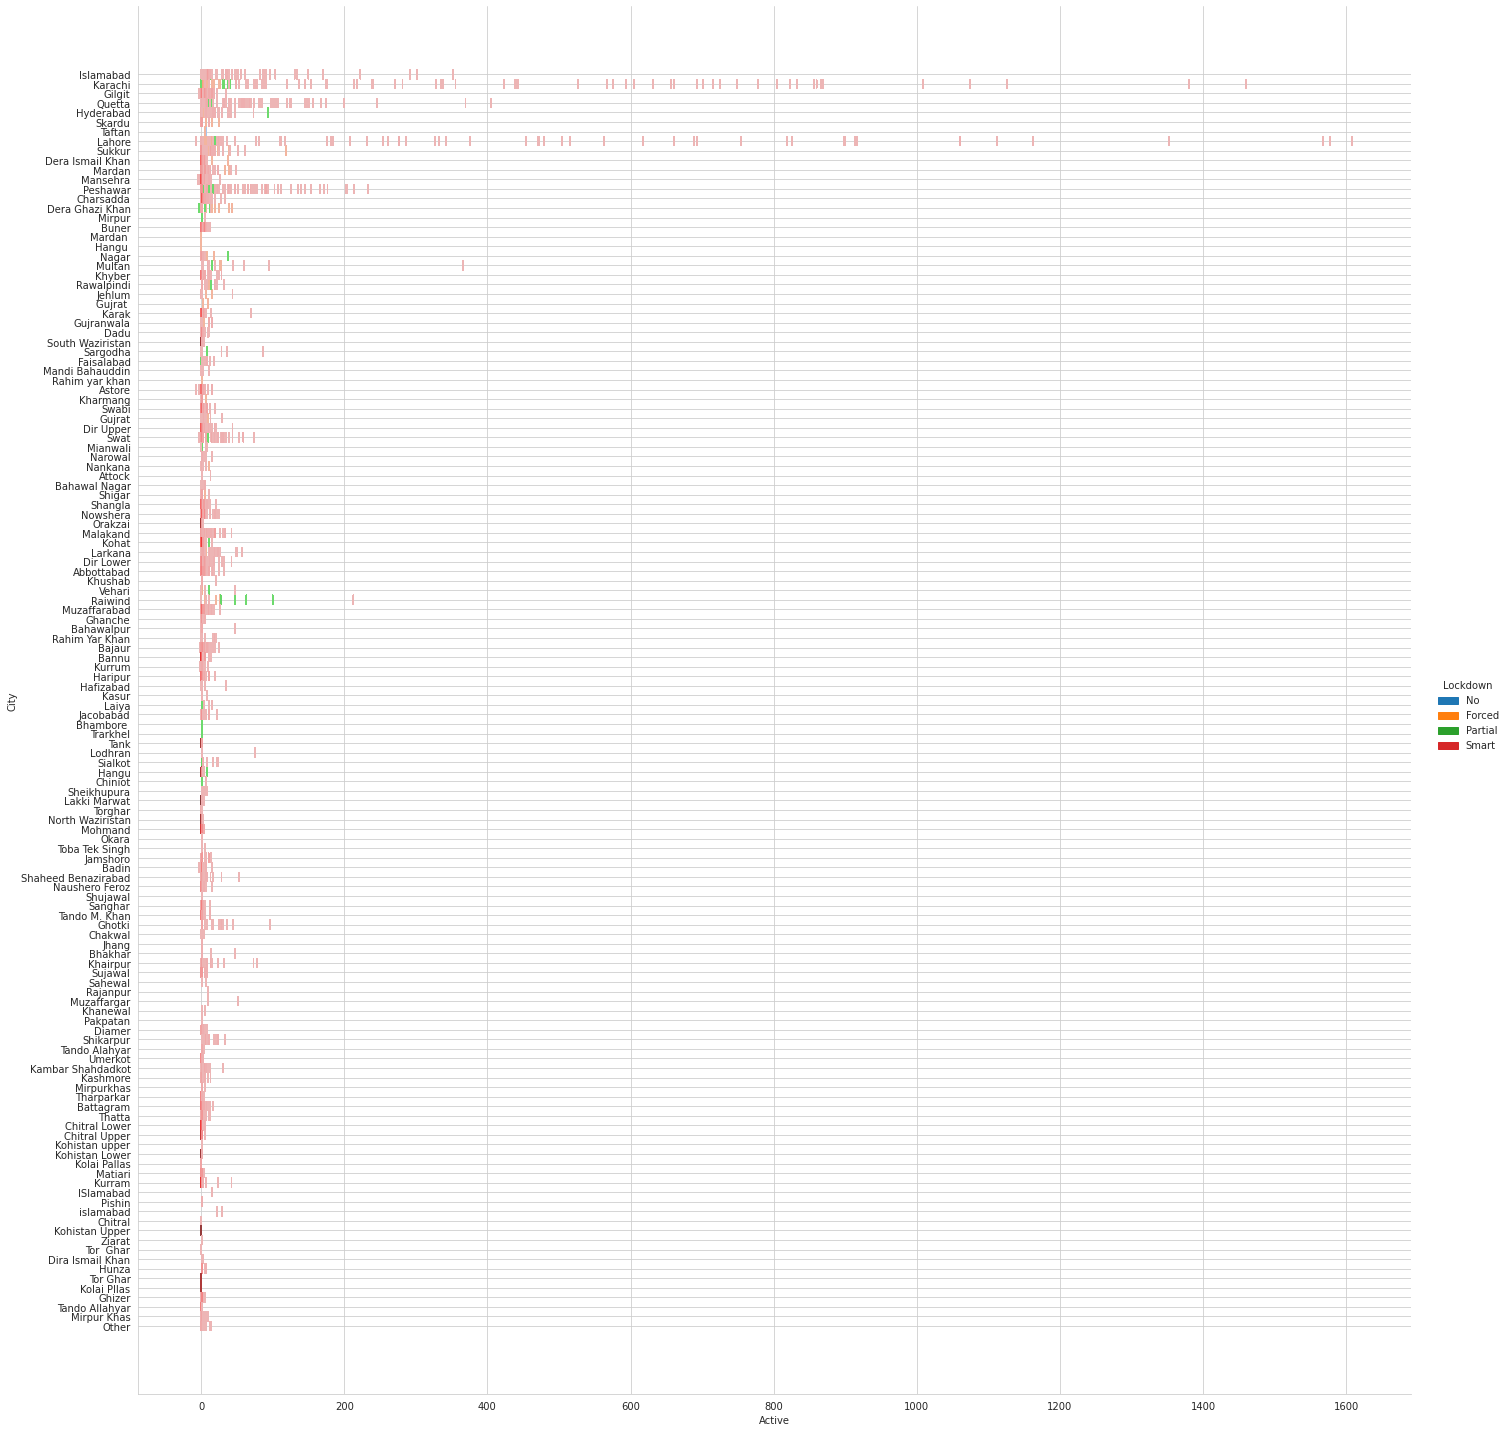

In [53]:
sns.displot(x='Active', y="City",data=data1,hue='Lockdown',height=20)
# see for the active cases

1.Cases and Active are highly correlated
2.In smart lockdown the cases(mean) increased.
3.The cause of the most of the corona cases is local - social contact,Unknown and iran mostly in islamabad and sindh and punjab.
4.most of the corona cases are found in karachi and lahore

we have the findings above we will create the features accordingly. Now the feature engineering part will start from here.

In [54]:
data1

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Lockdown,Active
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi,No,2
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi,No,1
4,2020-03-02,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,No,1
...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Unknown,Punjab,Lahore,Smart,916
2794,2020-05-31,1184,22,120,Unknown,Punjab,Lahore,Smart,1162
2795,2020-06-01,1610,43,95,Unknown,Punjab,Lahore,Smart,1567
2796,2020-06-02,1639,30,353,Unknown,Punjab,Lahore,Smart,1609


features of interest :
Date
Cases
Travel_history
Province 
City
Lockdown
Active

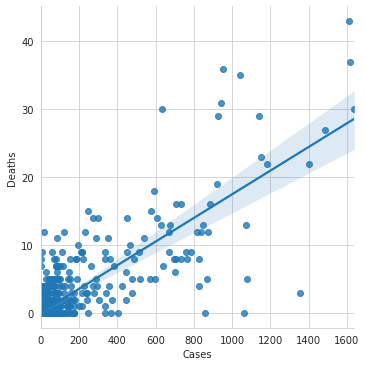

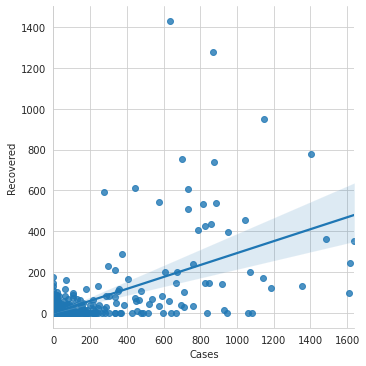

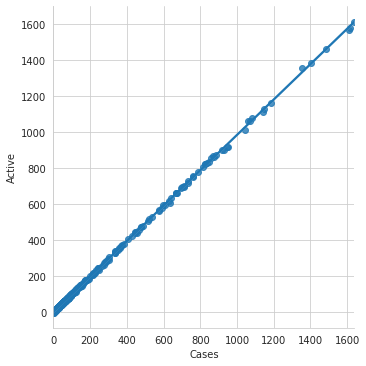

In [55]:
fig.set_size_inches(12, 5)
sns.lmplot(x='Cases',y='Deaths',data=data1)
sns.lmplot(x='Cases',y='Recovered',data=data1)
sns.lmplot(x='Cases',y='Active',data=data1)
# recovered and deaths column are correlated we will create bands of them

In [56]:
data1['smart_f']=np.where(data1['Lockdown']=='Smart',1,0)
# data1.drop('Lockdown',axis=1,inplace=True)
data1

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Lockdown,Active,smart_f
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi,No,2,0
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi,No,1,0
4,2020-03-02,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,No,1,0
...,...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Unknown,Punjab,Lahore,Smart,916,1
2794,2020-05-31,1184,22,120,Unknown,Punjab,Lahore,Smart,1162,1
2795,2020-06-01,1610,43,95,Unknown,Punjab,Lahore,Smart,1567,1
2796,2020-06-02,1639,30,353,Unknown,Punjab,Lahore,Smart,1609,1


In [57]:
# local - social contact,Unknown and iran
data1['th_f']=np.where(data1['Travel_history']=='Local - Social Contact',1,0)
# data1.drop('Travel_history',axis=1,inplace=True)
data1

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Lockdown,Active,smart_f,th_f
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi,No,2,0,0
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi,No,1,0,0
4,2020-03-02,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Unknown,Punjab,Lahore,Smart,916,1,0
2794,2020-05-31,1184,22,120,Unknown,Punjab,Lahore,Smart,1162,1,0
2795,2020-06-01,1610,43,95,Unknown,Punjab,Lahore,Smart,1567,1,0
2796,2020-06-02,1639,30,353,Unknown,Punjab,Lahore,Smart,1609,1,0


In [58]:
data1['province_f']=np.where(
    (data1['Province']=='Sindh')|(data1['Province']=='Punjab')|(data1['Province']=='Khyber Pakhtunkhwa'),1,0
    )
data1

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Lockdown,Active,smart_f,th_f,province_f
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0,0
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi,No,2,0,0,1
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0,0
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi,No,1,0,0,1
4,2020-03-02,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,No,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Unknown,Punjab,Lahore,Smart,916,1,0,1
2794,2020-05-31,1184,22,120,Unknown,Punjab,Lahore,Smart,1162,1,0,1
2795,2020-06-01,1610,43,95,Unknown,Punjab,Lahore,Smart,1567,1,0,1
2796,2020-06-02,1639,30,353,Unknown,Punjab,Lahore,Smart,1609,1,0,1


In [59]:
data1['city_f']=np.where(
    (data1['City']=='Karachi')|(data1['City']=='Lahore'),1,0
    )
data1

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Lockdown,Active,smart_f,th_f,province_f,city_f
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0,0,0
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi,No,2,0,0,1,1
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad,No,1,0,0,0,0
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi,No,1,0,0,1,1
4,2020-03-02,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,No,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Unknown,Punjab,Lahore,Smart,916,1,0,1,1
2794,2020-05-31,1184,22,120,Unknown,Punjab,Lahore,Smart,1162,1,0,1,1
2795,2020-06-01,1610,43,95,Unknown,Punjab,Lahore,Smart,1567,1,0,1,1
2796,2020-06-02,1639,30,353,Unknown,Punjab,Lahore,Smart,1609,1,0,1,1


In [60]:
data1.drop('Travel_history',axis=1,inplace=True)
data1.drop('Province',axis=1,inplace=True)
data1.drop('City',axis=1,inplace=True)
data1.drop('Lockdown',axis=1,inplace=True)

In [61]:
data1

,Date,Cases,Deaths,Recovered,Active,smart_f,th_f,province_f,city_f
0,2020-02-26,1,0,0,1,0,0,0,0
1,2020-02-26,2,0,0,2,0,0,1,1
2,2020-02-29,1,0,0,1,0,0,0,0
3,2020-02-29,1,0,0,1,0,0,1,1
4,2020-03-02,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,916,1,0,1,1
2794,2020-05-31,1184,22,120,1162,1,0,1,1
2795,2020-06-01,1610,43,95,1567,1,0,1,1
2796,2020-06-02,1639,30,353,1609,1,0,1,1


In [62]:
pdf=(data1[['Cases']])

In [63]:
pdf

,Cases
0,1
1,2
2,1
3,1
4,1
...,...
2793,952
2794,1184
2795,1610
2796,1639


In [64]:
ds=pdf.values
ds=ds.astype('float32')

In [65]:
ds

array([[1.000e+00],
       [2.000e+00],
       [1.000e+00],
       ...,
       [1.610e+03],
       [1.639e+03],
       [1.615e+03]], dtype=float32)

In [66]:
scaler=MinMaxScaler(feature_range=(0,1))
ds=scaler.fit_transform(ds)

In [67]:
ds

array([[6.1012810e-04],
       [1.2202562e-03],
       [6.1012810e-04],
       ...,
       [9.8230624e-01],
       [9.9999994e-01],
       [9.8535687e-01]], dtype=float32)

In [68]:
train_size = int(len(ds) * 0.67)
test_size = len(ds) - train_size
train, test = ds[0:train_size,:], ds[train_size:len(ds),:]
print(len(train), len(test))

1874 924


In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [70]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [84]:
model = Sequential()
model.add(Convolution1D(filters=10,kernel_size=1 , activation = 'tanh'))
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1,input_dim=look_back))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 2/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0028
Epoch 3/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 4/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 5/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 6/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0026
Epoch 7/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 8/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 9/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 10/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 11/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 12/100
1870/1870 [==============================] - 5s 3ms/step - lo

1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 98/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 99/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 100/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023


In [75]:
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1,input_dim=look_back))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 2/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 3/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 4/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 5/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 6/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 7/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 8/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 9/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 10/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 11/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 12/100
1870/1870 [==============================] - 4s 2ms/step - lo

1870/1870 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 98/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 99/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 100/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0024


In [76]:
# model = Sequential()
# model.add(Bidirectional(LSTM(4, input_shape=(1, look_back),activation='relu')))
# model.add(Dense(1,input_dim=look_back,activation='tanh'))
# model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
# model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0029 - accuracy: 0.2476
Epoch 2/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.2476
Epoch 3/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0026 - accuracy: 0.2476
Epoch 4/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0026 - accuracy: 0.2476
Epoch 5/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0026 - accuracy: 0.2476
Epoch 6/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.2476
Epoch 7/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0025 - accuracy: 0.2476
Epoch 8/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.2476
Epoch 9/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.2476
Epoch 10/100
1870/1870 [==============================] - 5s 2ms/step - l

1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 80/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 81/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 82/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 83/100
1870/1870 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 84/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 85/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 86/100
1870/1870 [==============================] - 5s 2ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 87/100
1870/1870 [==============================] - 5s 3ms/step - loss: 0.0023 - accuracy: 0.2476
Epoch 88/100
1870/1870 [==============================] - 4s 2ms/step - loss:

In [77]:
# model = Sequential()
# model.add(LSTM(4, return_sequences=True,input_shape=(1, look_back)))
# model.add(LSTM(10, return_sequences=True,input_shape=(1, look_back)))
# model.add(Dense(1,input_dim=look_back))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
1870/1870 [==============================] - 7s 3ms/step - loss: 0.0031
Epoch 2/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0029
Epoch 3/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0028
Epoch 4/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 5/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0027
Epoch 6/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0027
Epoch 7/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0027
Epoch 8/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0027
Epoch 9/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 10/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0026
Epoch 11/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 12/100
1870/1870 [==============================] - 7s 4ms/step - lo

1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 93/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 94/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 95/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 96/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 97/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 98/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 99/100
1870/1870 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 100/100
1870/1870 [==============================] - 7s 4ms/step - loss: 0.0024


In [85]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [86]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [87]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 76.95 RMSE
Test Score: 184.66 RMSE


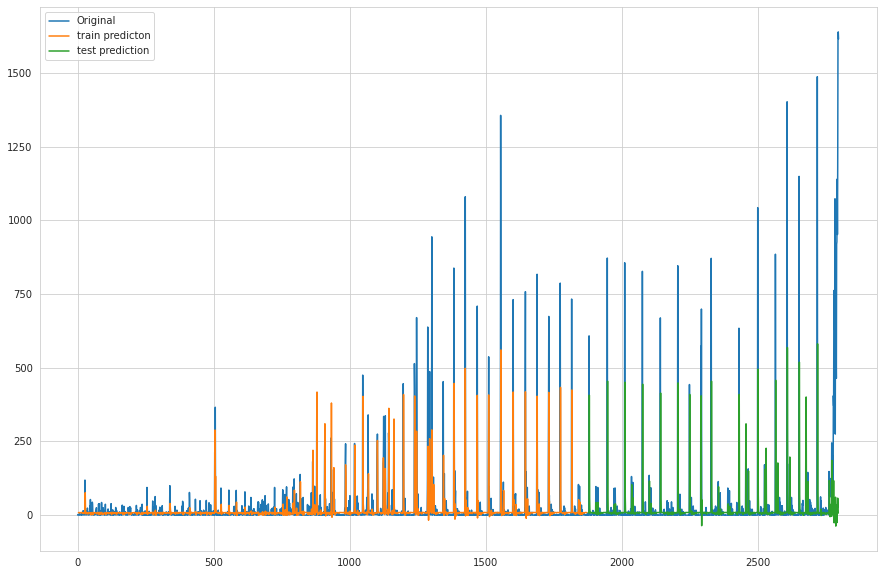

In [88]:
trainPredictPlot = np.empty_like(ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(ds)-1, :] = testPredict

plt.figure(figsize=(15,10))
plt.plot(scaler.inverse_transform(ds),label="Original")
plt.plot(trainPredictPlot,label="train predicton")
plt.plot(testPredictPlot,label="test prediction")
plt.legend()
plt.show()
# showing the original dataset in blue, 
# the predictions for the training dataset in red
# the predictions on the unseen test dataset in green.

results

LSTM
hyperparameters
when activation = tanh
last loss=0.0023
Train Score: 80.91 RMSE
Test Score: 187.08 RMSE
########################################
LSTM+CNN:
hyperparameters
when activation = tanh
last loss=0.0023
Train Score: 78.71 RMSE
Test Score: 187.62 RMSE
########################################
CNN:
hyperparameters
when activation = relu
last loss=0.0023
Train Score: 77.71 RMSE
Test Score: 183.99 RMSE

when activation = tanh
last loss=0.0024
Train Score: 80.71 RMSE
Test Score: 190.99 RMSE
#########################################
Bi-directional LSTM
hyperparameter
without any activation function 
last loss=0.0023
Train Score: 79.05 RMSE
Test Score: 184.95 RMSE

when activation=tanh
last loss=0.0024
Train Score: 80.20 RMSE
Test Score: 189.50 RMSE

when activation=relu
last loss=0.0023
Train Score: 77.39 RMSE
Test Score: 188.27 RMSE

when activation=relu+tanh
last loss=0.0022
Train Score: 85.61 RMSE
Test Score: 185.91 RMSE
#########################################



In [ ]:
# regressor = Sequential()
# regressor.add(Convolution1D(filters=10,kernel_size=1 , activation = 'tanh'))
# regressor.add(LSTM(units = 4, activation = 'tanh' ))
# regressor.add(Dense(8, input_dim=FUTURE_PERIOD_PREDICT, activation='tanh'))
# regressor.add(Dense(units = 1))
# opt = keras.optimizers.Adam(learning_rate=0.001)
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.fit(xtrain, ytrain, batch_size = 10, epochs = 200)
